# ML_Ng Homework 5: Support Vector Machines

In [33]:
%matplotlib inline
import numpy as np
from scipy.io import loadmat 
import matplotlib.pyplot as plt
from sklearn import svm

## Training and Visualize Different SVM Classifiers
### Dataset 1

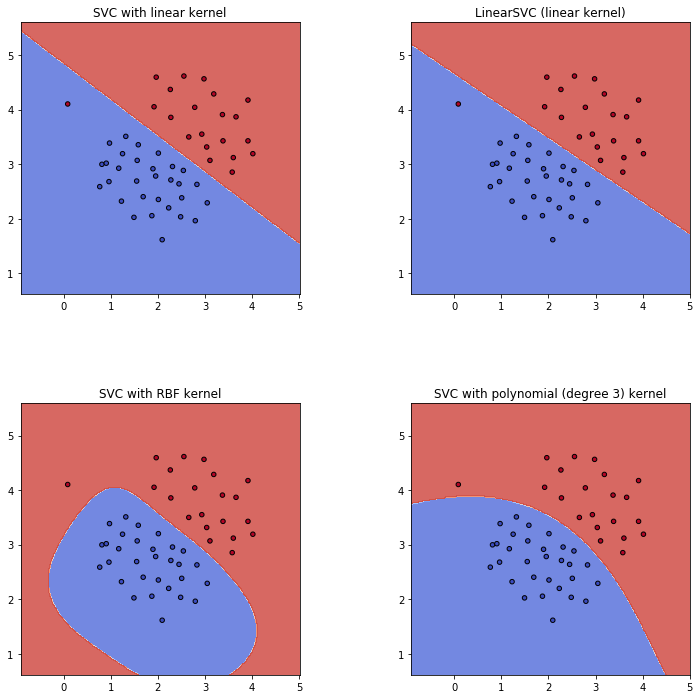

In [34]:
mat_contents = loadmat('ex6/ex6data1.mat')
Xtrain = mat_contents['X']
ytrain = np.ravel(mat_contents['y'])
m,n = Xtrain.shape

def make_meshgrid(x, y, h=.02, padding=1):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - padding, x.max() + padding
    y_min, y_max = y.min() - padding, y.max() + padding
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out



# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(Xtrain, ytrain) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(12,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = Xtrain[:, 0], Xtrain[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=ytrain, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()


### Load Dataset 2 and Visualize

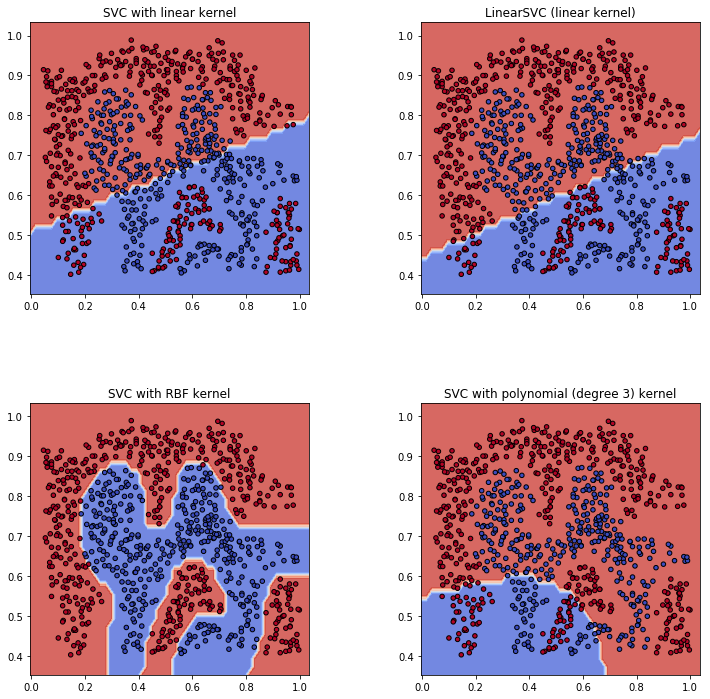

In [42]:
mat_contents = loadmat('ex6/ex6data2.mat')
Xtrain = mat_contents['X']
ytrain = np.ravel(mat_contents['y'])
m,n = Xtrain.shape

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=100, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(Xtrain, ytrain) for clf in models)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(12,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = Xtrain[:, 0], Xtrain[:, 1]
xx, yy = make_meshgrid(X0, X1, padding=0.05)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=ytrain, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()

### Load Dataset3

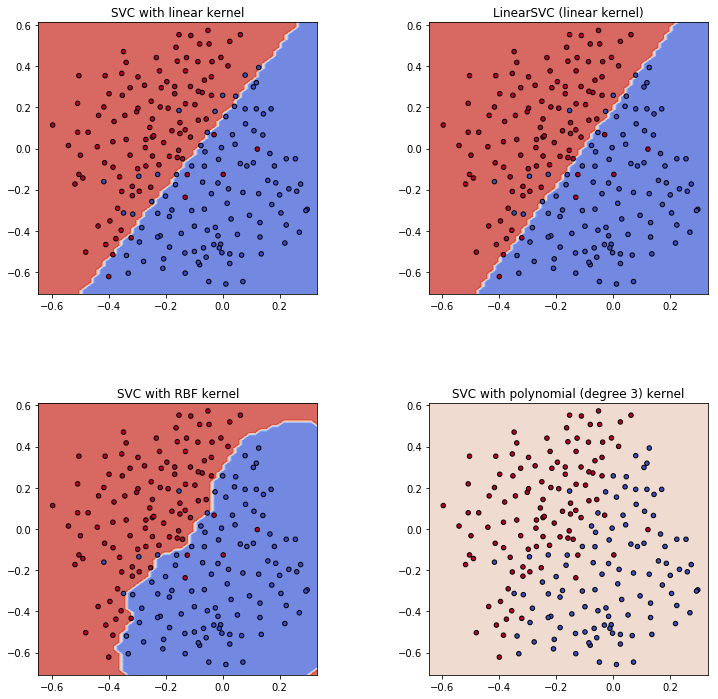

In [55]:
mat_contents = loadmat('ex6/ex6data3.mat')
Xtrain = mat_contents['X']
ytrain = np.ravel(mat_contents['y'])
m,n = Xtrain.shape

C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=100, C=C),
          svm.SVC(kernel='poly', C=C))
models = (clf.fit(Xtrain, ytrain) for clf in models)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2, figsize=(12,12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = Xtrain[:, 0], Xtrain[:, 1]
xx, yy = make_meshgrid(X0, X1, padding=0.05)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=ytrain, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_title(title)

plt.show()

## Spam Classifier

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
